In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle as shf
import tensorflow as tf

import imgaug as ia
from imgaug import augmenters as iaa

### Import files

In [2]:
  def load_data(folder , max_elements=None):
    path = os.path.join("input", folder)
    if not os.path.exists(path):
        print(f"Error: Folder '{folder}' does not exist.")
        return None

    files = os.listdir(path)
    if len(files) == 0:
        print(f"Error: No files found in folder '{folder}'.")
        return None

    if max_elements is not None:
        files = files[:max_elements]

    data = []
    num_processed = 0
    num_total = len(files)
    for file in files:
        if file != '.DS_Store':
            img_path = os.path.join(path, file)
            img = cv2.imread(img_path)
            print(img)
            img = cv2.resize(img, (224, 224))
            img = img.astype('float32') / 255.0

            data.append(img)
            
            num_processed += 1
            print(f"Processed image {num_processed}/{num_total}")
    return np.array(data)

In [3]:
max_elements_to_train = random.randint(50, 60)
max_elements_to_test = random.randint(40, 50)
max_elements_to_val = random.randint(0, 20)

In [4]:
train_normal = load_data('train/NORMAL', max_elements_to_train )
train_pneumonia = load_data('train/PNEUMONIA', max_elements_to_train)

test_normal = load_data('test/NORMAL', max_elements_to_test)
test_pneumonia = load_data('test/PNEUMONIA', max_elements_to_test)
    
val_normal = load_data('val/NORMAL', max_elements_to_val)
val_pneumonia = load_data('val/PNEUMONIA', max_elements_to_val)

[[[ 22  22  22]
  [ 24  24  24]
  [ 24  24  24]
  ...
  [ 96  96  96]
  [ 94  94  94]
  [ 93  93  93]]

 [[ 23  23  23]
  [ 24  24  24]
  [ 24  24  24]
  ...
  [ 97  97  97]
  [ 94  94  94]
  [ 92  92  92]]

 [[ 24  24  24]
  [ 24  24  24]
  [ 23  23  23]
  ...
  [ 99  99  99]
  [ 96  96  96]
  [ 94  94  94]]

 ...

 [[ 49  49  49]
  [ 50  50  50]
  [ 48  48  48]
  ...
  [119 119 119]
  [119 119 119]
  [119 119 119]]

 [[ 50  50  50]
  [ 52  52  52]
  [ 53  53  53]
  ...
  [123 123 123]
  [124 124 124]
  [123 123 123]]

 [[ 52  52  52]
  [ 53  53  53]
  [ 54  54  54]
  ...
  [129 129 129]
  [128 128 128]
  [127 127 127]]]
Processed image 1/51
[[[11 11 11]
  [11 11 11]
  [15 15 15]
  ...
  [17 17 17]
  [16 16 16]
  [15 15 15]]

 [[ 9  9  9]
  [10 10 10]
  [14 14 14]
  ...
  [17 17 17]
  [15 15 15]
  [13 13 13]]

 [[ 8  8  8]
  [10 10 10]
  [14 14 14]
  ...
  [18 18 18]
  [16 16 16]
  [15 15 15]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]


[[[243 243 243]
  [246 246 246]
  [253 253 253]
  ...
  [229 229 229]
  [228 228 228]
  [227 227 227]]

 [[245 245 245]
  [243 243 243]
  [245 245 245]
  ...
  [205 205 205]
  [202 202 202]
  [201 201 201]]

 [[243 243 243]
  [236 236 236]
  [236 236 236]
  ...
  [175 175 175]
  [171 171 171]
  [171 171 171]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
Processed image 18/51
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [

[[[87 87 87]
  [85 85 85]
  [89 89 89]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[86 86 86]
  [84 84 84]
  [88 88 88]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[87 87 87]
  [86 86 86]
  [89 89 89]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
Processed image 35/51
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [65 65 65]
  [62 62 62]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [66 66 66]
  [63 63 63]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [66 6

[[[19 19 19]
  [19 19 19]
  [18 18 18]
  ...
  [ 1  1  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[19 19 19]
  [19 19 19]
  [18 18 18]
  ...
  [ 1  1  1]
  [ 0  0  0]
  [ 0  0  0]]

 [[19 19 19]
  [19 19 19]
  [18 18 18]
  ...
  [ 1  1  1]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[10 10 10]
  [10 10 10]
  [10 10 10]
  ...
  [15 15 15]
  [15 15 15]
  [15 15 15]]

 [[10 10 10]
  [10 10 10]
  [10 10 10]
  ...
  [15 15 15]
  [15 15 15]
  [15 15 15]]

 [[10 10 10]
  [10 10 10]
  [10 10 10]
  ...
  [15 15 15]
  [15 15 15]
  [15 15 15]]]
Processed image 1/51
[[[66 66 66]
  [64 64 64]
  [62 62 62]
  ...
  [22 22 22]
  [23 23 23]
  [24 24 24]]

 [[66 66 66]
  [63 63 63]
  [61 61 61]
  ...
  [22 22 22]
  [23 23 23]
  [23 23 23]]

 [[67 67 67]
  [64 64 64]
  [61 61 61]
  ...
  [22 22 22]
  [22 22 22]
  [23 23 23]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Processed image 22/51
[[[  3   3   3]
  [  5   5   5]
  [  7   7   7]
  ...
  [104 104 104]
  [ 97  97  97]
  [ 92  92  92]]

 [[ 11  11  11]
  [ 12  12  12]
  [ 13  13  13]
  ...
  [104 104 104]
  [ 96  96  96]
  [ 86  86  86]]

 [[ 16  16  16]
  [ 17  17  17]
  [ 18  18  18]
  ...
  [112 112 112]
  [104 104 104]
  [ 88  88  88]]

 ...

 [[ 14  14  14]
  [ 14  14  14]
  [ 14  14  14]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]]

 [[ 14  14  14]
  [ 14  14  14]
  [ 14  14  14]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]]

 [[ 14  14  14]
  [ 14  14  14]
  [ 14

[[[ 0  0  0]
  [32 32 32]
  [33 33 33]
  ...
  [33 33 33]
  [34 34 34]
  [ 0  0  0]]

 [[ 0  0  0]
  [33 33 33]
  [33 33 33]
  ...
  [34 34 34]
  [34 34 34]
  [ 0  0  0]]

 [[ 1  1  1]
  [33 33 33]
  [33 33 33]
  ...
  [34 34 34]
  [34 34 34]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [28 28 28]
  [28 28 28]
  ...
  [34 34 34]
  [35 35 35]
  [ 0  0  0]]

 [[ 0  0  0]
  [29 29 29]
  [28 28 28]
  ...
  [34 34 34]
  [35 35 35]
  [ 0  0  0]]

 [[ 0  0  0]
  [29 29 29]
  [29 29 29]
  ...
  [35 35 35]
  [34 34 34]
  [ 0  0  0]]]
Processed image 1/47
[[[  0   0   0]
  [  1   1   1]
  [  1   1   1]
  ...
  [103 103 103]
  [  1   1   1]
  [  0   0   0]]

 [[  0   0   0]
  [  1   1   1]
  [  1   1   1]
  ...
  [104 104 104]
  [  2   2   2]
  [  0   0   0]]

 [[  0   0   0]
  [  1   1   1]
  [  1   1   1]
  ...
  [106 106 106]
  [  3   3   3]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  2   2   2]
  [  1   1   1]
  ...
  [ 36  36  36]
  [  0   0   0]
  [  1   1   1]]

 [[  0   0   0]
  [  1   1   1]
  [

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [8 8 8]
  [7 7 7]
  [2 2 2]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [8 8 8]
  [7 7 7]
  [2 2 2]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [8 8 8]
  [6 6 6]
  [2 2 2]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [5 5 5]
  [4 4 4]
  [2 2 2]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [5 5 5]
  [3 3 3]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [5 5 5]
  [3 3 3]
  [0 0 0]]]
Processed image 19/47
[[[ 0  0  0]
  [ 5  5  5]
  [ 8  8  8]
  ...
  [23 23 23]
  [21 21 21]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 5  5  5]
  [ 8  8  8]
  ...
  [23 23 23]
  [21 21 21]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 5  5  5]
  [ 8  8  8]
  ...
  [23 23 23]
  [21 21 21]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 4  4  4]
  [ 7  7  7]
  ...
  [ 6  6  6]
  [ 5  5  5]
  [ 3  3  3]]

 [[ 0  0  0]
  [ 4  4  4]
  [ 7  7  7]
  ...
  [ 6  6  6]
  [ 6  6  6]
  [ 3  3  3]]

 [[ 0  0  0]
  [ 4  4  4]
  [ 7  7  7]
  ...
  [ 7  7  7]
  [ 6  6  6]
  [ 3  3  3]]]
Processed image 20/47
[[[ 0  0  0]
  [21 2

[[[39 39 39]
  [41 41 41]
  [43 43 43]
  ...
  [88 88 88]
  [83 83 83]
  [78 78 78]]

 [[39 39 39]
  [40 40 40]
  [43 43 43]
  ...
  [80 80 80]
  [77 77 77]
  [74 74 74]]

 [[39 39 39]
  [40 40 40]
  [42 42 42]
  ...
  [73 73 73]
  [72 72 72]
  [72 72 72]]

 ...

 [[15 15 15]
  [15 15 15]
  [15 15 15]
  ...
  [ 6  6  6]
  [ 7  7  7]
  [ 8  8  8]]

 [[15 15 15]
  [15 15 15]
  [15 15 15]
  ...
  [ 6  6  6]
  [ 7  7  7]
  [ 8  8  8]]

 [[15 15 15]
  [15 15 15]
  [15 15 15]
  ...
  [ 6  6  6]
  [ 7  7  7]
  [ 8  8  8]]]
Processed image 42/47
[[[19 19 19]
  [19 19 19]
  [19 19 19]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[19 19 19]
  [19 19 19]
  [19 19 19]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[20 20 20]
  [20 20 20]
  [20 20 20]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[11 11 11]
  [13 13 13]
  [15 15 15]
  ...
  [17 17 17]
  [17 17 17]
  [18 18 18]]

 [[13 13 13]
  [12 12 12]
  [12 12 12]
  ...
  [18 18 18]
  [18 18 18]
  [19 19 19]]

 [[13 13 13]
  [12 1

[[[58 58 58]
  [59 59 59]
  [61 61 61]
  ...
  [54 54 54]
  [53 53 53]
  [52 52 52]]

 [[59 59 59]
  [60 60 60]
  [62 62 62]
  ...
  [55 55 55]
  [55 55 55]
  [53 53 53]]

 [[60 60 60]
  [62 62 62]
  [63 63 63]
  ...
  [57 57 57]
  [57 57 57]
  [55 55 55]]

 ...

 [[ 9  9  9]
  [ 9  9  9]
  [ 9  9  9]
  ...
  [ 5  5  5]
  [ 5  5  5]
  [ 5  5  5]]

 [[ 9  9  9]
  [ 9  9  9]
  [ 9  9  9]
  ...
  [ 5  5  5]
  [ 5  5  5]
  [ 5  5  5]]

 [[ 9  9  9]
  [ 9  9  9]
  [ 9  9  9]
  ...
  [ 5  5  5]
  [ 5  5  5]
  [ 5  5  5]]]
Processed image 10/47
[[[ 32  32  32]
  [ 33  33  33]
  [ 35  35  35]
  ...
  [174 174 174]
  [168 168 168]
  [167 167 167]]

 [[ 32  32  32]
  [ 33  33  33]
  [ 35  35  35]
  ...
  [161 161 161]
  [161 161 161]
  [164 164 164]]

 [[ 32  32  32]
  [ 33  33  33]
  [ 35  35  35]
  ...
  [149 149 149]
  [153 153 153]
  [161 161 161]]

 ...

 [[ 18  18  18]
  [ 18  18  18]
  [ 18  18  18]
  ...
  [ 17  17  17]
  [ 17  17  17]
  [ 18  18  18]]

 [[ 18  18  18]
  [ 18  18  18]
  

[[[68 68 68]
  [66 66 66]
  [63 63 63]
  ...
  [36 36 36]
  [34 34 34]
  [32 32 32]]

 [[64 64 64]
  [63 63 63]
  [61 61 61]
  ...
  [36 36 36]
  [34 34 34]
  [32 32 32]]

 [[62 62 62]
  [62 62 62]
  [63 63 63]
  ...
  [35 35 35]
  [33 33 33]
  [31 31 31]]

 ...

 [[42 42 42]
  [42 42 42]
  [42 42 42]
  ...
  [40 40 40]
  [40 40 40]
  [40 40 40]]

 [[42 42 42]
  [42 42 42]
  [42 42 42]
  ...
  [40 40 40]
  [40 40 40]
  [40 40 40]]

 [[42 42 42]
  [42 42 42]
  [42 42 42]
  ...
  [40 40 40]
  [40 40 40]
  [40 40 40]]]
Processed image 31/47
[[[ 51  51  51]
  [ 45  45  45]
  [ 32  32  32]
  ...
  [196 196 196]
  [195 195 195]
  [194 194 194]]

 [[ 40  40  40]
  [ 38  38  38]
  [ 30  30  30]
  ...
  [196 196 196]
  [194 194 194]
  [192 192 192]]

 [[ 40  40  40]
  [ 41  41  41]
  [ 35  35  35]
  ...
  [196 196 196]
  [194 194 194]
  [192 192 192]]

 ...

 [[163 163 163]
  [149 149 149]
  [136 136 136]
  ...
  [ 33  33  33]
  [ 32  32  32]
  [ 32  32  32]]

 [[154 154 154]
  [144 144 144]
  

[[[ 46  46  46]
  [ 54  54  54]
  [ 59  59  59]
  ...
  [ 40  40  40]
  [ 39  39  39]
  [ 39  39  39]]

 [[ 56  56  56]
  [ 59  59  59]
  [ 45  45  45]
  ...
  [ 39  39  39]
  [ 38  38  38]
  [ 37  37  37]]

 [[ 54  54  54]
  [ 52  52  52]
  [ 42  42  42]
  ...
  [ 38  38  38]
  [ 37  37  37]
  [ 36  36  36]]

 ...

 [[244 244 244]
  [ 13  13  13]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [  0   0   0]
  [  4   4   4]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
Processed image 3/9
[[[ 84  84  84]
  [ 85  85  85]
  [ 93  93  93]
  ...
  [ 15  15  15]
  [ 13  13  13]
  [ 16  16  16]]

 [[ 82  82  82]
  [ 82  82  82]
  [ 85  85  85]
  ...
  [ 14  14  14]
  [ 13  13  13]
  [ 13  13  13]]

 [[ 83  83  83]
  [ 79  79  79]
  [ 89  89  89]
  ...
  [ 20  20  20]
  [ 19  19  19]
  [ 18  18  18]]

 ...

 [[252 252 252]
  [  8   8   8]


### Visualisation

In [5]:
def visualize_data(normal_data, pneumonia_data):
    if normal_data is None or pneumonia_data is None:
        print("Error: Data is not loaded correctly.")
        return

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
    labels = ['Normal', 'Pneumonia']

    for i, data in enumerate([normal_data, pneumonia_data]):
        if data is not None:
            for j, img in enumerate(data[:4]):
                axes[i, j].imshow(img, cmap='gray')
                axes[i, j].axis('off')
                axes[i, j].set_title(labels[i])

    plt.tight_layout()
    plt.axis('off')
    plt.show()


In [6]:
def visualize_data(normal_data, pneumonia_data):
    if normal_data is None or pneumonia_data is None:
        print("Error: Data is not loaded correctly.")
        return

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
    labels = ['Normal', 'Pneumonia']

    for i, data in enumerate([normal_data, pneumonia_data]):
        if data is not None:
            for j, img in enumerate(data[:4]):
                axes[i, j].imshow(img, cmap='gray')
                axes[i, j].axis('off')
                axes[i, j].set_title(labels[i])

    plt.tight_layout()
    plt.axis('off')
    plt.show()


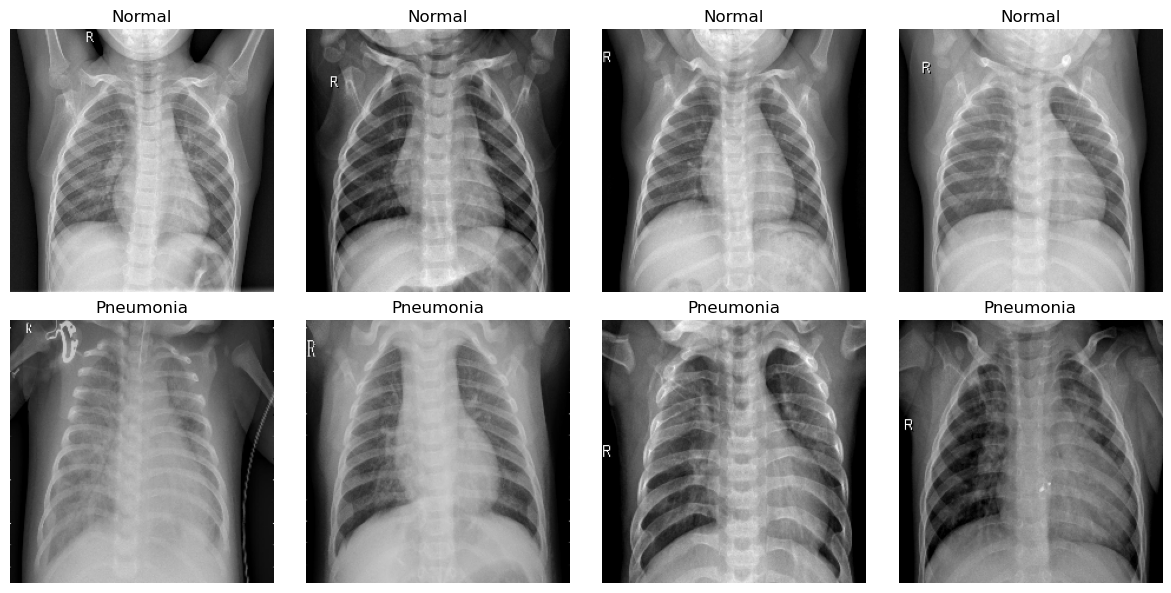

In [7]:
# Visualize training data
visualize_data(train_normal, train_pneumonia)

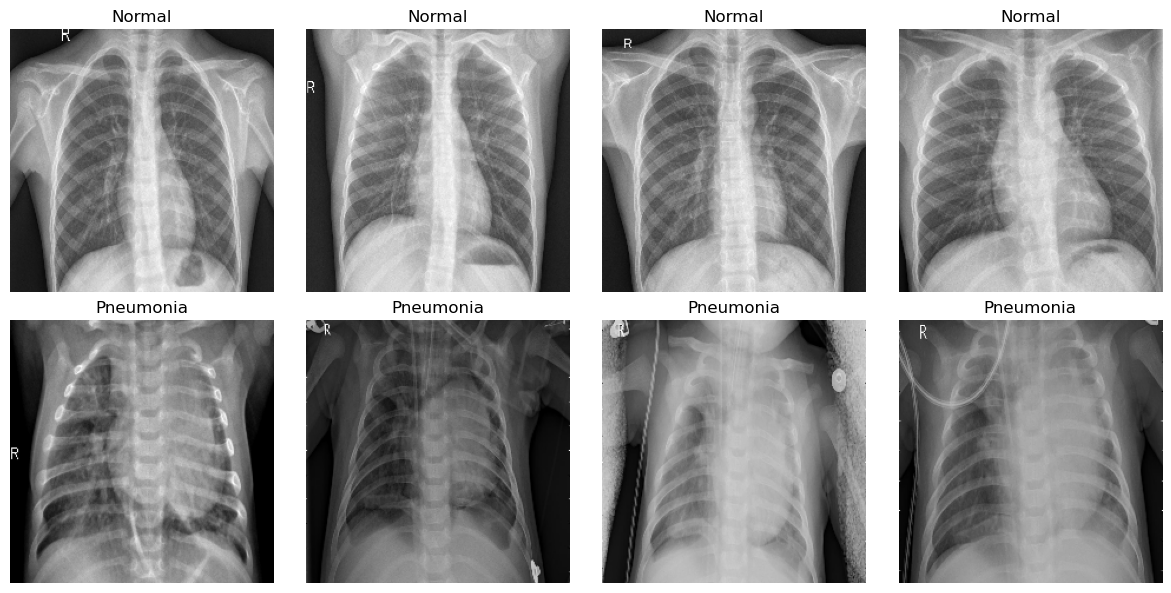

In [8]:
# Visualize test data
visualize_data(test_normal, test_pneumonia)

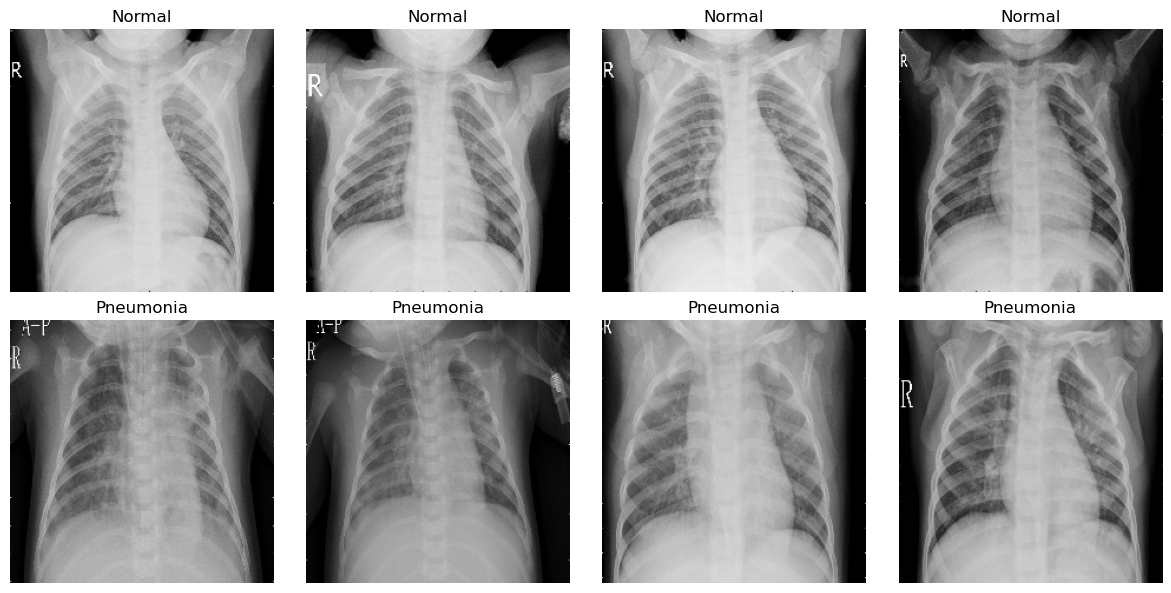

In [9]:
# Visualize validation data
visualize_data(val_normal, val_pneumonia)

In [10]:
def visualize_data_distribution(train_normal, train_pneumonia, dossier):
    if train_normal is None or train_pneumonia is None:
        print("Error: Data is not loaded correctly.")
        return

    num_normal = len(train_normal)
    num_pneumonia = len(train_pneumonia)

    labels = ['Normal', 'Pneumonia']

    counts = [num_normal, num_pneumonia]

    plt.bar(labels, counts)
    plt.xlabel('Labels')
    plt.ylabel('Number of samples')
    plt.title(f'Visualize {dossier} distribution')
    plt.show()

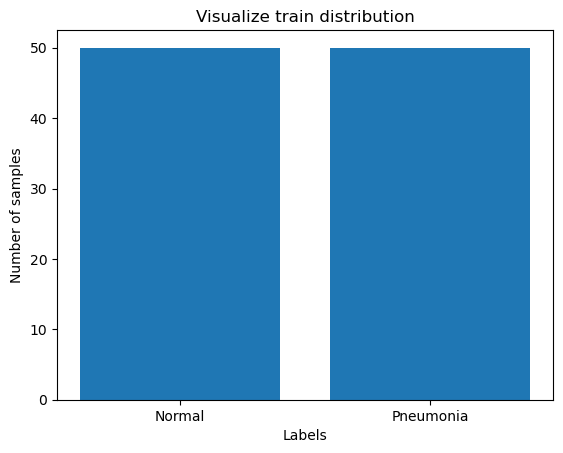

In [11]:
# Visualize distribution data
visualize_data_distribution(train_normal, train_pneumonia, 'train')

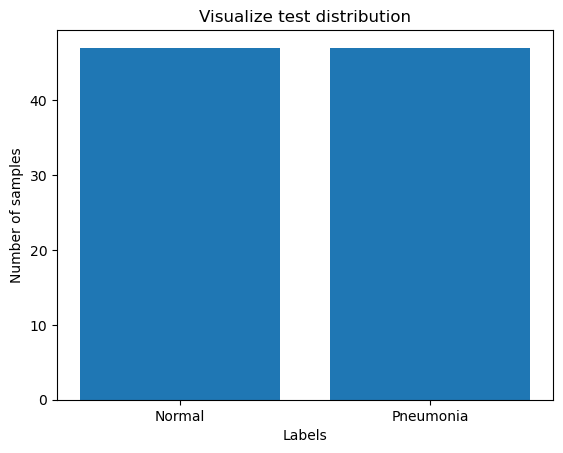

In [12]:
# Visualize distribution data
visualize_data_distribution(test_normal, test_pneumonia, 'test')

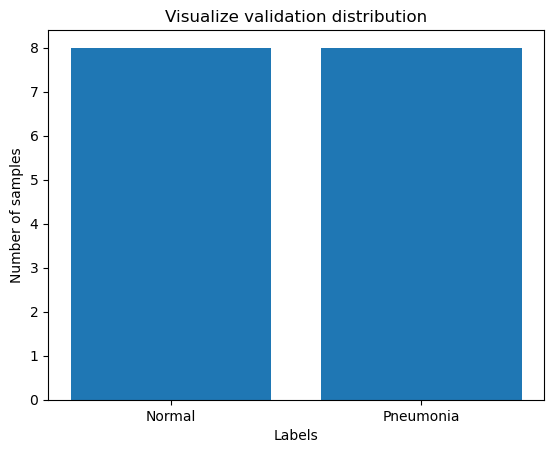

In [13]:
# Visualize distribution data
visualize_data_distribution(val_normal, val_pneumonia, 'validation')

In [14]:
X_train = np.concatenate((train_normal, train_pneumonia))
y_train = np.concatenate((np.zeros(train_normal.shape[0]), np.ones(train_pneumonia.shape[0])))

In [15]:
X_test = np.concatenate((test_normal, test_pneumonia))
y_test = np.concatenate((np.zeros(test_normal.shape[0]), np.ones(test_pneumonia.shape[0])))

In [16]:
X_val = np.concatenate((val_normal, val_pneumonia))
y_val = np.concatenate((np.zeros(val_normal.shape[0]), np.ones(val_pneumonia.shape[0])))

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(100, 224, 224, 3)
(100,)
(16, 224, 224, 3)
(16,)


### Model

In [18]:
batch_size=64
percent=0.6
learning_rate=0.00001
epochs = 10

random_state= 1
max_iter=100

In [19]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [20]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X_train_flat)

for k in k_values:
    print(k, '/30')
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y_train, cv=5)
    scores.append(np.mean(score))

1 /30
2 /30
3 /30
4 /30
5 /30
6 /30
7 /30
8 /30
9 /30
10 /30
11 /30
12 /30
13 /30
14 /30
15 /30
16 /30
17 /30
18 /30
19 /30
20 /30
21 /30
22 /30
23 /30
24 /30
25 /30
26 /30
27 /30
28 /30
29 /30
30 /30


Text(0, 0.5, 'Accuracy Score')

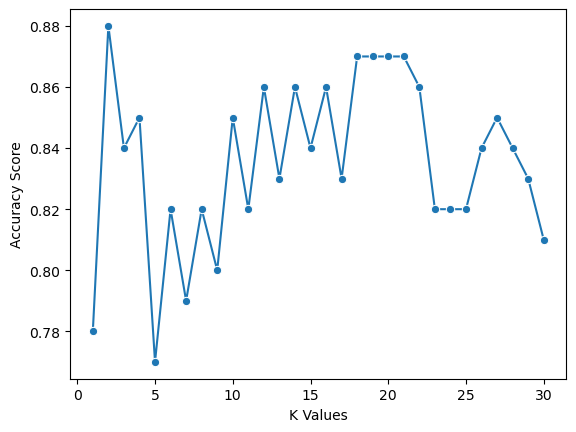

In [21]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [22]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

In [23]:
print(best_k)

2


In [24]:
knn = KNeighborsClassifier(n_neighbors=best_k)

In [25]:
knn.fit(X_train_flat, y_train)

KNeighborsClassifier(n_neighbors=2)

In [27]:
print('KNN accuracy score is: ' + str(knn.score(X_train_flat, y_train)))

KNN accuracy score is: 0.97


### Evaluate the model

In [28]:
predict_out = knn.predict(X_test_flat)
print(y_test, '\n', predict_out)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


In [29]:
accuracy = accuracy_score(y_test, predict_out)
precision = precision_score(y_test, predict_out)
recall = recall_score(y_test, predict_out)

In [30]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8617021276595744
Precision: 0.8863636363636364
Recall: 0.8297872340425532


In [31]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predict_out)

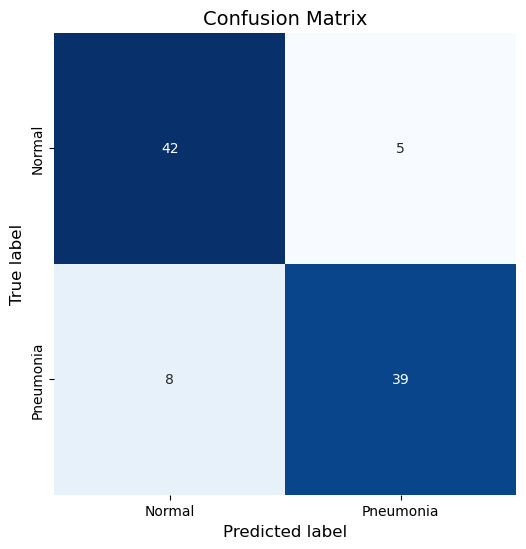

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=['Normal','Pneumonia'], yticklabels=['Normal','Pneumonia'])
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()